## Credit Card Fraud Detection - Kaggle
https://www.kaggle.com/mlg-ulb/creditcardfraud

### Import and explore data

In [ ]:
# best practice to import all necessary libraries and packages in one place to be able to amend quickly if necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from numpy import argmax

In [127]:

df = pd.read_csv('creditcard.csv')

In [128]:
df.shape

(284807, 31)

In [129]:
df.describe()
# 28 input variables + Time + Amount + Class

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


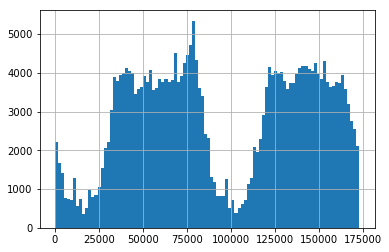

In [130]:
df['Time'].hist(bins=100)
plt.show()
# seems to be two groups of transactions, shorter and longer elapse

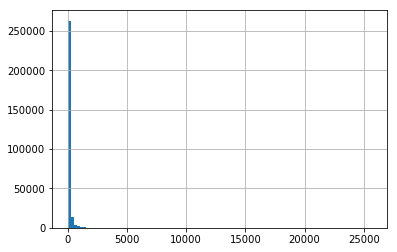

In [131]:
df['Amount'].hist(bins=100)
plt.show()
# there is clearly some important outliers in this variable. To be checked if related to fraud or not

In [132]:
df.groupby('Class')['Amount'].describe()
# seems that outliers called out above are not necessary frauds

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [133]:
# since most of the data has alread been scaled we shall also scale above two metrics
# Robust Scaler less prone to outliers
rob_scaler = RobustScaler()

df['Amount_scaled'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(columns=['Amount','Time'], axis=1, inplace=True)

In [134]:
df.isnull().sum().sum()
# no null values

0

In [135]:
df['Class'].value_counts(normalize=True)
# highly unbalanced dataset, only 0,17% of positive class
# this mean we will be using Area Under Precision-Recall curve instead of usual confusion matrix

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [136]:
#sns.pairplot(df, corner=True, hue='Class')

### Split train, validation and test data sets

In [137]:
X = df.drop(columns='Class').values
y = df['Class'].values
X_train, X_te, y_train, y_te = train_test_split(X, y, test_size=0.1, random_state=18)

In [138]:
print('Train data set shape: {}, count of positive class {} ({:.2f}%)'.format(X_train.shape, y_train.sum(), 100*y_train.sum()/len(y_train)))
print('Test data set shape: {}, count of positive class: {} ({:.2f}%)'.format(X_te.shape, y_te.sum(), 100*y_te.sum()/len(y_te)))

Train data set shape: (256326, 30), count of positive class 451 (0.18%)
Test data set shape: (28481, 30), count of positive class: 41 (0.14%)


In [139]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.1, random_state=18)
# wondering if shall increase test_size to allow model to better validate restuls. On train set k-fold can be used to "augment" data set

In [140]:
print('Train data set shape: {}, count of positive class {} ({:.2f}%)'.format(X_tr.shape, y_tr.sum(), 100*y_tr.sum()/len(y_tr)))
print('validation data set shape: {}, count of positive class: {} ({:.2f}%)'.format(X_va.shape, y_va.sum(), 100*y_va.sum()/len(y_va)))

Train data set shape: (230693, 30), count of positive class 400 (0.17%)
validation data set shape: (25633, 30), count of positive class: 51 (0.20%)


### Machine Learning models

* Decided to go with single example of LogisticRegression but could apply same logic for K-NN, SVC, DecisionTree or RandomForest..and ideally compare performance to take only best one

#### LogisticRegression

In [141]:
logreg = LogisticRegression(multi_class='ovr',solver='liblinear') # treid with class_weight = 'balanced' which improved recall but dratically decrease precision

In [142]:
logreg.fit(X_tr, y_tr)
logreg.score(X_va, y_va)
# accuracy score is not meaningful as we are working on highly imbalanced data set

0.9992197557835603

##### Confusion Matrix

In [143]:
matrix_logreg = confusion_matrix(y_true=y_va, y_pred=logreg.predict(X_va))
pd.DataFrame(
    matrix_logreg, 
    columns=['pred: no spam', 'pred: spam'],
    index=['true: no spam', 'true: spam'])

,pred: no spam,pred: spam
true: no spam,25582,0
true: spam,20,31


##### Classification Report

In [202]:
print(classification_report(y_true=y_va, y_pred=logreg.predict(X_va), target_names=('no spam','spam')))

              precision    recall  f1-score   support

     no spam       1.00      1.00      1.00     25582
        spam       1.00      0.61      0.76        51

    accuracy                           1.00     25633
   macro avg       1.00      0.80      0.88     25633
weighted avg       1.00      1.00      1.00     25633



In [145]:
print('Prediction as spam in validation set: {}'.format(sum(logreg.predict(X_va))))

Prediction as spam in validation set: 31


In [146]:
logreg.predict_proba(X_va)[logreg.predict_proba(X_va)[:,1] > 0.5][:,1]
# probabilities for spam prediction in validation set

array([0.99868061, 0.99995021, 0.99832785, 1.        , 0.87341674,
       0.93257644, 0.91752785, 0.99754475, 0.71783435, 0.99688261,
       0.63917417, 0.99986781, 0.85477435, 0.99999952, 0.97429275,
       0.92575105, 0.98877258, 0.99999999, 0.99999996, 1.        ,
       0.99911438, 0.99999997, 0.96963014, 0.50076356, 0.99531732,
       0.98948787, 0.98487586, 0.76397868, 0.99927402, 1.        ,
       0.99999974])

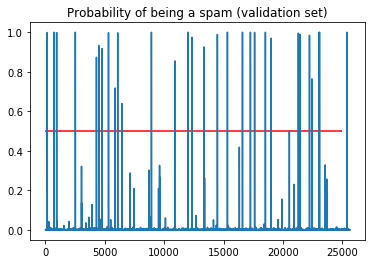

In [147]:
plt.plot(logreg.predict_proba(X_va)[:,1])
plt.hlines(y=0.5, xmin=0, xmax=25000, color='red')
plt.title('Probability of being a spam (validation set)')
plt.show()

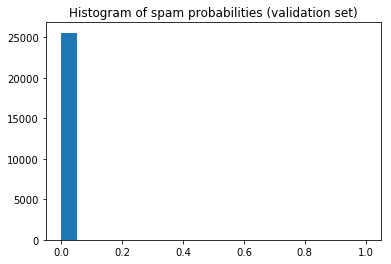

In [148]:
plt.hist(logreg.predict_proba(X_va)[:,1], bins=np.linspace(0,1,20))
plt.title('Histogram of spam probabilities (validation set)')
plt.show()

In [149]:
np.round(np.sort(logreg.predict_proba(X_va)[y_va == 1][:,1]),3)
# probabilities of being spam for "true spam", sorted ascending (validation set)
# allow to understand if wrong prediction were close to 0.5 threshold => if working on threshold could help (but shall also consider "true no spam" which are close to 0.5 threshold)

array([0.001, 0.001, 0.001, 0.003, 0.004, 0.006, 0.009, 0.013, 0.052,
       0.061, 0.073, 0.156, 0.183, 0.21 , 0.228, 0.231, 0.257, 0.268,
       0.329, 0.419, 0.501, 0.639, 0.718, 0.764, 0.855, 0.873, 0.918,
       0.926, 0.933, 0.97 , 0.974, 0.985, 0.989, 0.989, 0.995, 0.997,
       0.998, 0.998, 0.999, 0.999, 0.999, 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])

#### Precision-Recall curve and optimized threshold

In [150]:
# Precision-Recall Curves (used over ROC as better fit for imbalanced classes as focus on positive class only)
# predict class values
precision_va, recall_va, thres_pr_va = precision_recall_curve(y_va, logreg.predict_proba(X_va)[:,1], pos_label=1)

In [151]:
# area under curve
auc_pr_va = auc(recall_va, precision_va)

In [152]:
# summarize scores
print('Logistic Regression Area Under PR Curve: auc={:.3f}'.format(auc_pr_va))

Logistic Regression Area Under PR Curve: auc=0.842


Text(0.5, 1.0, 'PR curve Logistic Regression: Delay')

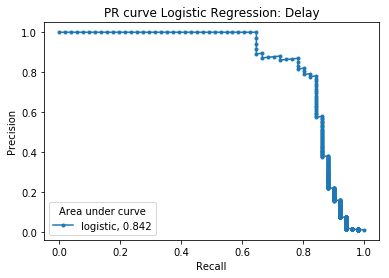

In [153]:
plt.plot(recall_va, precision_va, marker='.', label='logistic, {:.3f}'.format(auc_pr_va))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(title='Area under curve')
plt.title('PR curve Logistic Regression: Delay')

In [154]:
# optimizing threshold for f1 score
fscores_va = (2* precision_va * recall_va) / (precision_va + recall_va)
bt_pr_va = thres_pr_va[argmax(fscores_va)] # best threshold
# argmax(fscores_va) -> gives index of maximum value for fscores
print('Best threshold: {:.3f}'.format(bt_pr_va))

Best threshold: 0.156


In [155]:
# use threshold in model
curve_va = np.where(logreg.predict_proba(X_va)[:,1] > bt_pr_va, 1, 0) # create prediction based on new threshold on probabilities
print('Probabilities:',logreg.predict_proba(X_va)[0:10,1])
print('Predictions:',curve_va[0:10])

Probabilities: [2.71942038e-05 3.61327661e-05 2.66692408e-05 2.73192629e-04
 7.08230648e-05 3.58027626e-05 4.37379890e-04 2.77860753e-04
 1.06892358e-04 4.74291672e-05]
Predictions: [0 0 0 0 0 0 0 0 0 0]


#### Classification report after threshold optimization

In [156]:
print(classification_report(y_true=y_va, y_pred=curve_va, target_names=['no_delay','delay']))
# slight improvements in f1-score (0.76 to 0.81) => precision (1.00 to 0.87) but recall (0.61 to 0.76)

              precision    recall  f1-score   support

    no_delay       1.00      1.00      1.00     25582
       delay       0.87      0.76      0.81        51

    accuracy                           1.00     25633
   macro avg       0.93      0.88      0.91     25633
weighted avg       1.00      1.00      1.00     25633



### Logistic Regression with GridSearch on Hyperparameters

In [77]:
# merging train and validation sets for the use of cross-validation
X_tr_va = np.concatenate((X_tr,X_va))
y_tr_va = np.concatenate((y_tr, y_va))
print('Shape train/valid input:',X_tr_va.shape)
print('Shape train/valid output:',y_tr_va.shape)

Shape train/valid input: (256326, 30)
Shape train/valid output: (256326,)


In [78]:
logreg_tuned = LogisticRegression(multi_class='ovr',solver='liblinear')

In [79]:
# Create grid
grid = [{
    'C':np.logspace(-4,4,3),
    'multi_class':['ovr'],
    'solver':['liblinear'],
    'class_weight':[None,'balanced']
},{
    'C':np.logspace(-4,4,3),
    'multi_class':['multinomial'],
    'solver':['saga'],
    'class_weight':[None,'balanced']
}]

# Create cross validation object
# planning to use AP (average_precision') for scoring on AUPRC (https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/)
scoring = ['precision','recall','average_precision','f1'] # replace in below GridSearchCV
# not that for classifiers the CV is per-default stratified
grid_cv = GridSearchCV(estimator=logreg_tuned, param_grid=grid, n_jobs=4, cv=10, refit=False,verbose=1, return_train_score=True, scoring=scoring)

In [80]:
grid_cv.fit(X_tr_va,y_tr_va)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             n_jobs=4,
             param_grid=[{'C': array([1.e-04, 1.e+00, 1.e+04]),
                          'class_weight': [None, 'balanced'],
                          'multi_class': ['ovr'], 'solver': ['liblinear']},
                         {'C': array([1.e-04, 1.e+00, 1.e+04]),
                          'class_weight': [None, 'balanced'],
                          'multi_class': ['multinomial'], 'solver': ['saga']}],
             refit=False, return_train_score=True,
             scoring=['precision', 'recall', 'average_precision', 'f1'],
             verbose=1)

In [81]:
grid_cv.cv_results_['mean_test_recall']

array([0.47231884, 0.91144928, 0.66096618, 0.91806763, 0.66096618,
       0.91806763, 0.372657  , 0.90483092, 0.62768116, 0.91589372,
       0.62768116, 0.91589372])

In [82]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_multi_class', 'param_solver', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'split9_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'split5_train_precision', 'split6_train_precision', 'split7_train_precision', 'split8_train_precision', 'split9_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'split5_test_recall', 'split6_test_recall', 'split7_test_recall', 'split8_test_recall', 'split9_test_rec

In [83]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_C','param_multi_class','param_class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_cv_df = pd.DataFrame(grid_cv.cv_results_)[cols].sort_values(by='mean_test_average_precision', ascending=False)
grid_cv_df

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_C,param_multi_class,param_class_weight,mean_fit_time,mean_score_time
2,0.786583,0.791004,0.061954,0.759165,0.762835,0.660966,0.661987,0.896555,0.900084,1,ovr,None,8.949387,0.057102
4,0.785096,0.790561,0.061582,0.757496,0.765071,0.660966,0.666176,0.891669,0.898588,10000,ovr,None,9.202390,0.060800
3,0.778571,0.774884,0.063476,0.134463,0.134323,0.918068,0.925354,0.072558,0.072427,1,ovr,balanced,9.028689,0.055301
5,0.778558,0.774869,0.063453,0.134461,0.134218,0.918068,0.925354,0.072557,0.072365,10000,ovr,balanced,9.942095,0.057700
11,0.778524,0.773481,0.064321,0.135249,0.135331,0.915894,0.922891,0.073031,0.073025,10000,multinomial,balanced,32.941558,0.049799
9,0.778478,0.774210,0.064030,0.136285,0.135900,0.915894,0.922891,0.073638,0.073357,1,multinomial,balanced,32.228378,0.052698
6,0.777596,0.772049,0.070518,0.513493,0.517398,0.372657,0.372505,0.860929,0.846952,0.0001,multinomial,None,35.233783,0.053399
10,0.755257,0.755575,0.061650,0.730900,0.742970,0.627681,0.639814,0.884658,0.885973,10000,multinomial,None,32.043437,0.046100
8,0.755215,0.755561,0.061681,0.730900,0.743344,0.627681,0.640306,0.884658,0.886057,1,multinomial,None,32.116715,0.049204
1,0.739887,0.736296,0.065302,0.124447,0.125651,0.911449,0.920180,0.066787,0.067433,0.0001,ovr,balanced,2.716826,0.057697


#### Final threshold setting avec GridSearchCV

In [93]:
# hyper-parameters similar as one initially used => no difference but keeping cells for potentiel future usage
logreg_final = LogisticRegression(multi_class='ovr', solver='liblinear', C=1, class_weight=None) # the one optimizing AP is doing it through high recall but super low precision
logreg_final.fit(X_tr, y_tr)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [85]:
# Precision-Recall Curves (used over ROC as better fit for imbalanced classes as focus on positive class only)
# predict class values
precision_logreg, recall_logreg, thres_pr_logreg = precision_recall_curve(y_va, logreg_final.predict_proba(X_va)[:,1], pos_label=1)

In [86]:
# area under curve
auc_pr_logreg = auc(recall_logreg, precision_logreg)

In [87]:
# summarize scores
print('Logistic Regression Area Under PR Curve: auc={:.3f}'.format(auc_pr_logreg))

Logistic Regression Area Under PR Curve: auc=0.842


Text(0.5, 1.0, 'PR curve Logistic Regression: Delay')

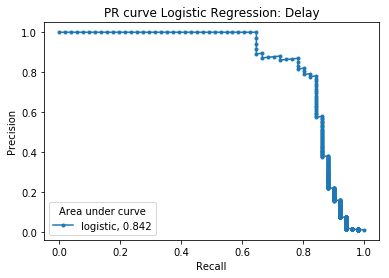

In [88]:
plt.plot(recall_logreg, precision_logreg, marker='.', label='logistic, {:.3f}'.format(auc_pr_logreg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(title='Area under curve')
plt.title('PR curve Logistic Regression: Delay')

In [89]:
# optimizing threshold for f1 score
fscores_logreg = (2* precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)
bt_pr_logreg = thres_pr_logreg[argmax(fscores_logreg)] # best threshold
# argmax(fscores_va) -> gives index of maximum value for fscores
print('Best threshold: {:.3f}'.format(bt_pr_logreg))

Best threshold: 0.156


In [90]:
# use threshold in model
curve_logreg = np.where(logreg_final.predict_proba(X_va)[:,1] > bt_pr_logreg, 1, 0) # create prediction based on new threshold on probabilities
print('Probabilities:',logreg_final.predict_proba(X_va)[0:10,1])
print('Predictions:',curve_logreg[0:10])

Probabilities: [2.71942038e-05 3.61327661e-05 2.66692408e-05 2.73192629e-04
 7.08230648e-05 3.58027626e-05 4.37379890e-04 2.77860753e-04
 1.06892358e-04 4.74291672e-05]
Predictions: [0 0 0 0 0 0 0 0 0 0]


#### Classification report after threshold optimization

In [92]:
print(classification_report(y_true=y_va, y_pred=curve_logreg, target_names=['no_delay','delay']))
# no improvements with GridSearchCV as had already best hyperparameters

              precision    recall  f1-score   support

    no_delay       1.00      1.00      1.00     25582
       delay       0.87      0.76      0.81        51

    accuracy                           1.00     25633
   macro avg       0.93      0.88      0.91     25633
weighted avg       1.00      1.00      1.00     25633



### Random Under-Sampling (test)
* Could also have looking into Over-Smapling or SMOTE

In [157]:
X_train

array([[-0.34526222,  1.59828253,  0.98771358, ..., -0.17062388,
        -0.09543771,  0.52044784],
       [ 1.14588575, -0.23407313,  1.0595158 , ...,  0.01875768,
        -0.21644659, -0.35932048],
       [-1.45033798, -1.21866376,  1.78448814, ..., -0.16800411,
         1.42346119, -0.04283415],
       ...,
       [-0.24155471,  1.04569144,  1.41665368, ...,  0.19677734,
        -0.25864599,  0.46651159],
       [ 1.90800215, -0.01911116, -1.82579751, ..., -0.0382688 ,
        -0.05603298,  0.89827183],
       [ 0.64031785, -1.97513033,  0.6683151 , ...,  0.06570518,
         4.44700622, -0.54608254]])

In [158]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
df_new = pd.DataFrame(X_train)
df_new.insert(0, 'Class', y_train)

In [176]:
df_new['Class'].sum()

451

In [188]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df_new = df_new.sample(frac=1)

# amount of fraud classes 451 rows.
fraud_df = df_new.loc[df_new['Class'] == 1]
non_fraud_df = df_new.loc[df_new['Class'] == 0][:451]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=18)

new_df.shape

(902, 31)

In [191]:
new_df['Class'].value_counts()

1    451
0    451
Name: Class, dtype: int64

In [192]:
# Undersampling before cross validating (prone to overfit)
X_under = new_df.drop('Class', axis=1)
y_under = new_df['Class']

In [193]:
# Data is already scaled we should split our training and test sets
# This is explicitly used for undersampling.
X_tr_under, X_te_under, y_tr_under, y_te_under = train_test_split(X_under, y_under, test_size=0.2, random_state=18)

In [195]:
# Turn the values into an array for feeding the classification algorithms.
X_tr_u = X_tr_under.values
X_te_u = X_te_under.values
y_tr_u = y_tr_under.values
y_te_u = y_te_under.values

In [220]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [221]:
# Can look at accuracy here as we have a balanced set
# Logistic Regression getting the best score
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_tr_u, y_tr_u)
    training_score = cross_val_score(classifier, X_tr_u, y_tr_u, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [225]:
lr_under = LogisticRegression()
lr_under.fit(X_tr_u, y_tr_u)

LogisticRegression()

In [227]:
print(classification_report(y_true=y_va, y_pred=lr_under.predict(X_va), target_names=('no spam','spam')))
# allows to reach very high recall but low precision. Would make sense if interested in calling out all potential spams independently of also including no-spam
# could make sense to do this as would flag items and still be much faster and risky than doing manually

              precision    recall  f1-score   support

     no spam       1.00      0.96      0.98     25582
        spam       0.05      0.94      0.09        51

    accuracy                           0.96     25633
   macro avg       0.52      0.95      0.54     25633
weighted avg       1.00      0.96      0.98     25633



In [229]:
# bonus: interesting read on PCA vs T_SNE (latest one is better fit for Imbalanced sets like fraud detection or other anomaly detection)
# https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/
# https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d